In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd

# read data 
train = pd.read_csv('/kaggle/input/titanic-all-datasets/train.csv')
test  = pd.read_csv('/kaggle/input/titanic-all-datasets/test.csv')
gender_sub  = pd.read_csv('/kaggle/input/titanic-all-datasets/gender_submission.csv')

# show
display(train.head())
display(test.head())
display(gender_sub.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
# General info
print(train.info())
print(train.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [6]:
# General info
print(test.info())
print(test.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


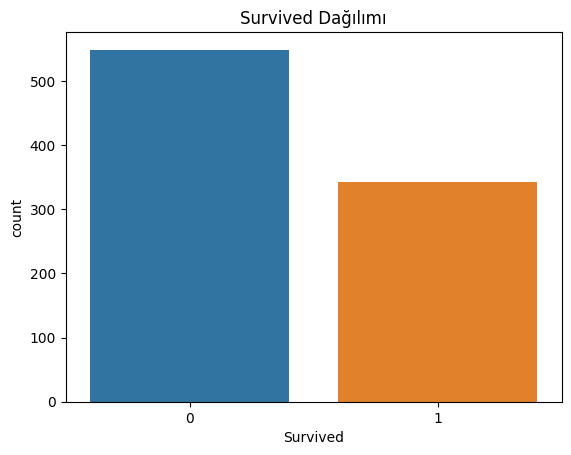

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train, x='Survived')
plt.title('Survived')
plt.show()

Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64



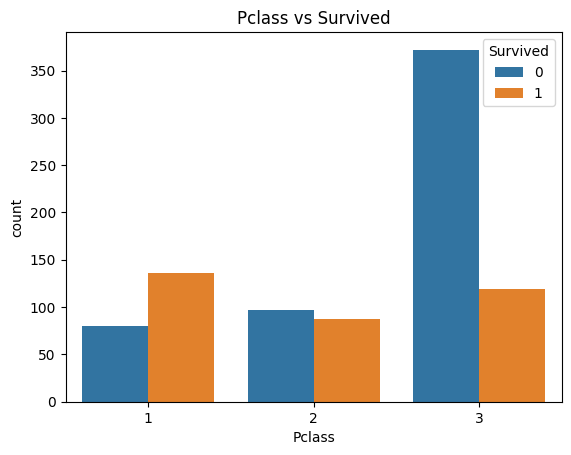

Sex
Sex
male      577
female    314
Name: count, dtype: int64



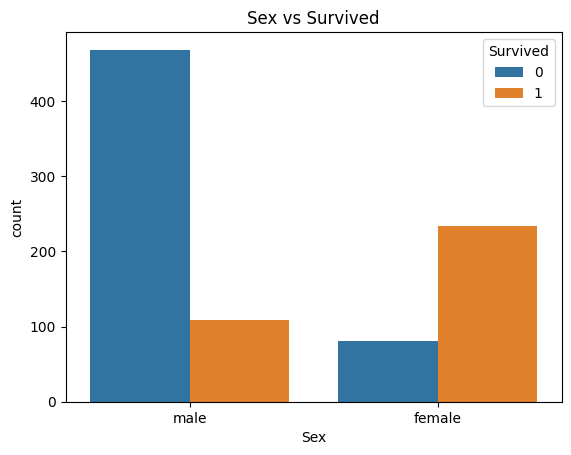

Embarked
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



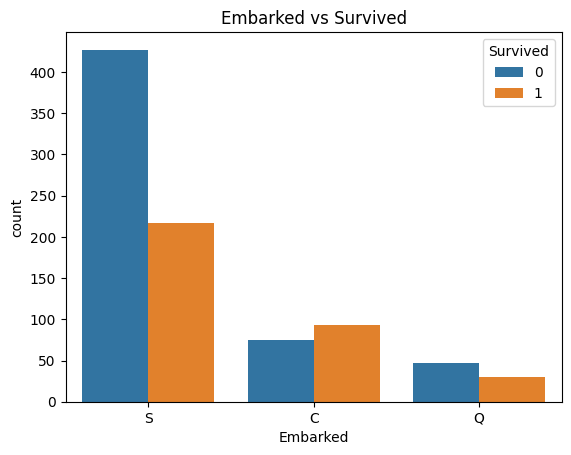

In [10]:
for col in ['Pclass','Sex','Embarked']:
    print(col, train[col].value_counts(), sep='\n', end='\n\n')
    sns.countplot(data=train, x=col, hue='Survived')
    plt.title(f'{col} vs Survived')
    plt.show()

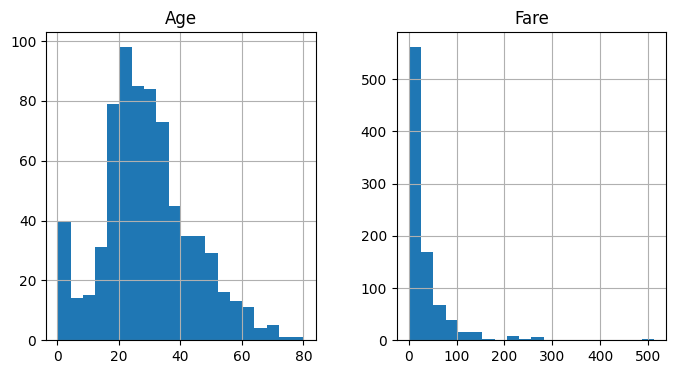

In [11]:
numeric_cols = ['Age','Fare']
train[numeric_cols].hist(bins=20, figsize=(8,4))
plt.show()

In [14]:
import pandas as pd
import numpy as np

# Mark and merge train/test
train['is_train'] = 1
test['is_train']  = 0
test['Survived'] = np.nan
df = pd.concat([train, test], sort=False)

# Fill in missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare']     = df['Fare'].fillna(df['Fare'].median())

# Extract title and fill in age
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
df['Title'] = df['Title'].where(df['Title'].isin(common_titles), 'Other')
df['Age']   = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

# Create deck
df['Deck'] = df['Cabin'].str[0].fillna('U')

# Family size and loneliness
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone']    = (df['FamilySize'] == 1).astype(int)

# Convert sex to digital
df['Sex'] = (df['Sex']=='male').astype(int)

# 7) One-hot encode
for col in ['Pclass','Embarked','Title','Deck']:
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)

# Discard unnecessary columns
df = df.drop(columns=['PassengerId','Name','Ticket','Cabin','is_train'])

# Separate it back
train_clean = df[df['Survived'].notnull()].copy()
test_clean  = df[df['Survived'].isnull()].drop(columns=['Survived']).copy()
train_clean['Survived'] = train_clean['Survived'].astype(int)

print("OK—train_clean and test_clean is ready.")


OK—train_clean ve test_clean hazır.


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate feature and target
cols_to_drop = ['Survived', 'Pclass', 'Embarked', 'Title', 'Deck']
X = train_clean.drop(columns=cols_to_drop)
y = train_clean['Survived']

# Split into Training/Validation set (example: 80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
acc_lr = accuracy_score(y_val, y_pred_lr)

print("Logistic Regression")
print("Accuracy:", acc_lr)
print(classification_report(y_val, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
acc_rf = accuracy_score(y_val, y_pred_rf)

print("\nRandom Forest")
print("Accuracy:", acc_rf)
print(classification_report(y_val, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))

# 5-Fold Cross-Validation
cv_lr = cross_val_score(lr, X, y, cv=5)
cv_rf = cross_val_score(rf, X, y, cv=5)

print("\n5-Fold CV Accuracy")
print("Logistic Regression CV:", cv_lr.mean(), "±", cv_lr.std())
print("Random Forest CV:       ", cv_rf.mean(), "±", cv_rf.std())


Logistic Regression
Accuracy: 0.8491620111731844
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.83      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179

Confusion Matrix:
 [[99 11]
 [16 53]]

Random Forest
Accuracy: 0.7430167597765364
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       110
           1       0.66      0.68      0.67        69

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179

Confusion Matrix:
 [[86 24]
 [22 47]]

5-Fold CV Accuracy
Logistic Regression CV: 0.8305379448873266 ± 0.02134565208455554
Random Forest CV:        0.80585022911305 ± 0.030383028292886034


In [19]:
cols_to_drop = ['Survived','Pclass','Embarked','Title','Deck']
X = train_clean.drop(columns=cols_to_drop)
y = train_clean['Survived']

lr_final = LogisticRegression(max_iter=1000)
lr_final.fit(X, y)


LogisticRegression(max_iter=1000)

In [20]:
X_test = test_clean[X.columns]

In [21]:
preds = lr_final.predict(X_test)

In [22]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'], 
    'Survived': preds.astype(int)
})
submission.to_csv('submission.csv', index=False)
print("submission.csv is ready.")

submission.csv is ready.


In [24]:
import os
print(os.path.abspath('submission.csv'))


/kaggle/working/submission.csv
